In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



<IPython.core.display.Javascript object>

In [3]:
def imshow_cv2plt(bgr_img):
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()
    # known: w,h,either new_h/new_w
# w/h = new_width/hew_height
def resize(img, width=None, height=None):
    h, w = img.shape[:2]

    if width is not None and height is not None:
        pass
    if width is not None:
        height = width * (h / w)
        height = round(height)
    elif new_h is not None:
        width = height * (w / h)
        width = round(width)
    else:
        ValueError("No dimensions provided")

    resized = cv2.resize(img, (width, height))
    return resized


<IPython.core.display.Javascript object>

In [4]:
# list all files in data dir
image_paths = glob.glob("data/*")
print(image_paths)

['data\\catdog.jpg', 'data\\catdog.png', 'data\\Googled.jpg']


<IPython.core.display.Javascript object>

In [5]:
google = "data\\Googled.jpg"
see_me = cv2.imread(google)

<IPython.core.display.Javascript object>

(463, 576, 3)
uint8


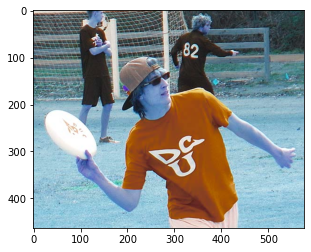

<IPython.core.display.Javascript object>

In [6]:
print(see_me.shape)
print(see_me.dtype)
plt.imshow(see_me)
plt.show()

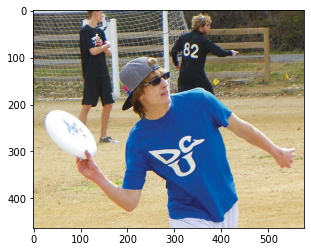

<IPython.core.display.Javascript object>

In [7]:
imshow_cv2plt(see_me)

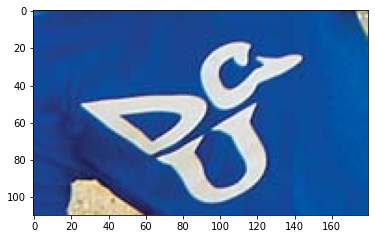

<IPython.core.display.Javascript object>

In [8]:
imshow_cv2plt(see_me[250:360, 220:400])

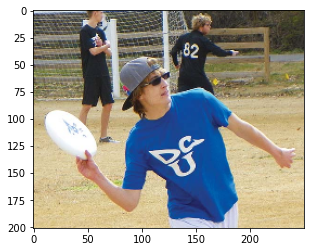

<IPython.core.display.Javascript object>

In [9]:
see_me = resize(see_me, width=250)

imshow_cv2plt(see_me)

In [10]:
image_path = "data/catdog.png"
# Image is in BGR format in Open CV by default

# greyscale
# 0-255
image = cv2.imread(image_path)

<IPython.core.display.Javascript object>

In [11]:
darken = image.copy()
darken = np.clip(darken[470:800, 360:750], 0, 25)
darken.shape


(330, 390, 3)

<IPython.core.display.Javascript object>

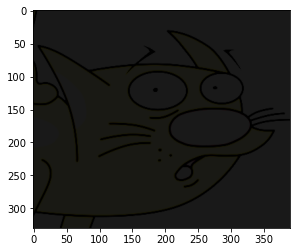

<IPython.core.display.Javascript object>

In [12]:
imshow_cv2plt(darken)

In [13]:
bright = image.copy()
bright = np.clip(bright[470:800, 360:750], 155, 255)
bright.shape

(330, 390, 3)

<IPython.core.display.Javascript object>

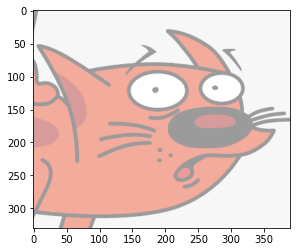

<IPython.core.display.Javascript object>

In [15]:
imshow_cv2plt(bright)

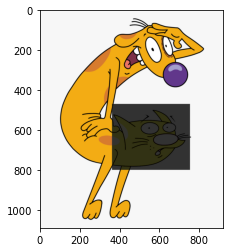

<IPython.core.display.Javascript object>

In [16]:
cat_dark = image.copy()
# darken area around cat
cat_dark[470:800, 360:750, 0:3] = np.clip((cat_dark[470:800, 360:750, 0:3]), 0, 50)
# test = np.clip(test[470:800, 360:750, 0:2] - 355, 0, 255)
imshow_cv2plt(cat_dark)

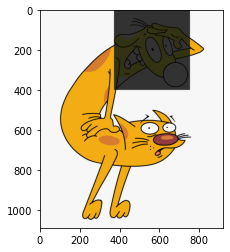

<IPython.core.display.Javascript object>

In [17]:
dog_dark = image.copy()
# darken area around dog
np.where(dog_dark)
dog_dark[0:400, 370:750, 0:3] = np.clip((dog_dark[0:400, 370:750, 0:3]), 0, 50)
imshow_cv2plt(dog_dark)

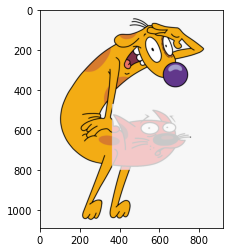

<IPython.core.display.Javascript object>

In [18]:
cat_light = image.copy()
# lighten area around cat
cat_light[470:800, 360:750, 0:3] = np.clip((cat_light[470:800, 360:750, 0:3]), 200, 250)
imshow_cv2plt(cat_light)

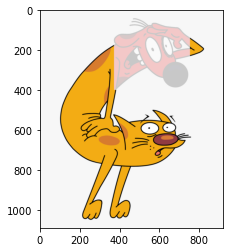

<IPython.core.display.Javascript object>

In [28]:
dog_light = image.copy()
# lighten area around dog
dog_light[0:400, 370:750, 0:3] = np.clip((dog_light[0:400, 370:750, 0:3]), 200, 250)
plt.imshow(dog_light)

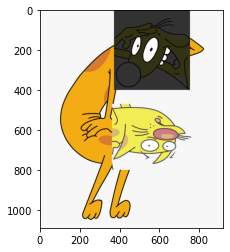

<IPython.core.display.Javascript object>

In [22]:
# The goal for the 1st output is to horizontally flip & darken dog's head and to vertically flip & brighten cat's head

goal1 = image.copy()
# let's brighten and flip the cat head
# goal1[470:800, 360:750, 0:3] = np.clip((goal1[470:800, 360:750, 0:3]), 200, 250)
goal1[470:800, 360:750, 0:3] = np.where(
    goal1[470:800, 360:750, 0:3] >= 247,
    goal1[470:800, 360:750, 0:3],
    np.clip((goal1[470:800, 360:750, 0:3]), goal1[470:800, 360:750, 0:3] + 65, 255),
)
goal1[470:800, 360:750, 0:3] = cv2.flip(goal1[470:800, 360:750, 0:3], -1)
goal1[470:800, 360:750, 0:3] = cv2.flip(goal1[470:800, 360:750, 0:3], 1)
# now let's X-flip and darken dog
goal1[0:400, 370:750, 0:3] = np.where(
    goal1[0:400, 370:750, 0:3] > 247,
    goal1[0:400, 370:750, 0:3],
    np.clip((goal1[0:400, 370:750, 0:3]), 0, 50),
)

goal1[0:400, 370:750, 0:3] = cv2.flip(goal1[0:400, 370:750, 0:3], 1)

imshow_cv2plt(goal1)

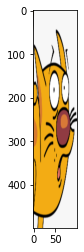

<IPython.core.display.Javascript object>

In [23]:
# Superimpose a weird cat on top of cat
superimpose = image.copy()
big_cat = superimpose[470:800, 360:750, 0:3]
big_cat = cv2.resize(big_cat, (100, 500))
imshow_cv2plt(big_cat)

<ipython-input-24-96eea47530d3>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


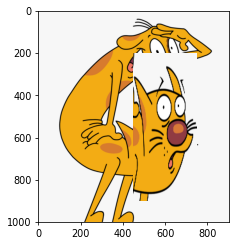

<IPython.core.display.Javascript object>

In [24]:
# don't stress don't stress
image = cv2.cvtColor(superimpose, cv2.COLOR_BGR2RGB)
figure = plt.figure(dpi=70)
subplot = figure.add_subplot(111)
subplot.set_xlim(0, 900)
subplot.set_ylim(1000, 0)
subplot.imshow(image, origin=[0, 0])

# xmin, xmax, ymin, ymax
subplot.imshow(cv2.cvtColor(big_cat, cv2.COLOR_BGR2RGB), extent=[450, 750, 900, 200])

figure.show()